## Submission Deadline

- All submissions must be made before 10:00 PM on Thursday, April 18, 2024.

## Submission Guidelines

- Format: Submissions are to be made in PDF format via Avenue to Learn, either individually or as a group of up to three members.
    - GitHub Repository: Your submission must include a link to a public GitHub repository containing the assignment.
    - Team Submissions: For group submissions, Question 15 must detail each member's contributions. Note that while there are no points allocated to Question 15, failure to provide this information will result in the assignment not being graded.

## Late Submissions

- 15% will be deducted from assignments each day after the due date (rounding up).

-   Assignments won't be accepted after 48 hours after the due date.

## Assignment Standards

Please ensure your assignment adheres to the following standards for submission:

- **Title Page Requirements:** Each submission must include a title page featuring your group members' names and student numbers. Assignments lacking a title page will not be considered for grading.
- **Individual Work:** While discussing homework problems with peers and group is permitted, the final written submission must be your group work.
- **Formatting Preferences:** The use of LaTeX for document preparation is highly recommended.
- **Font and Spacing:** Submissions must utilize an eleven-point font (Times New Roman or a similar font) with 1.5 line spacing. Ensure margins of at least 1 inch on all sides.
- **Submission Content:** Do not include the assignment questions within your PDF. Instead, clearly mark each response with the corresponding question number. Screenshots are not an acceptable form of submission under any circumstances.
- **Academic Writing:** Ensure that your writing and any references used are appropriate for an undergraduate level of study.
- **Originality Checks:** Be aware that the instructor may use various tools, including those available on the internet, to verify the originality of submitted assignments.
-  Assignment policy on the use of generative AI:
    -  Students are not permitted to use generative AI in this assignment. In alignment with [McMaster academic integrity policy](https://secretariat.mcmaster.ca/app/uploads/Academic-Integrity-Policy-1-1.pdf), it "shall be an offence knowingly to ...  submit academic work for assessment that was purchased or acquired from another source".  This includes work created by generative AI tools. Also state in the policy is the following, "Contract Cheating is the act of"outsourcing of student work to third parties" (Lancaster & Clarke, 2016, p. 639)
    with or without payment." Using Generative AI tools is a form of contract cheating.  Charges of academic dishonesty will be brought forward to the Office of Academic Integrity. 

\newpage

In [28]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import rand_score
from sklearn.preprocessing import StandardScaler
from fancyimpute import SoftImpute
from sklearn.model_selection import train_test_split

1. **Classification Problem Identification:** Define and describe a classification problem based on the dataset.

I retrieved the dataframe from @kidneydata.

In [2]:
kidney_disease = pd.read_csv('kidney_disease.csv')
kidney_disease.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


Looking at the paper by @kidneypredict, models used to predict CKD prognosis are most often training using the following variables: blood pressure, age, serum cholesterol, sex, serum potassium, blood hemoglobin, serum sodium, serum calcium, BMI, and serum albumin. Our dataframe from @kidneydata includes blood pressure, age, potassium, hemoglobin, sodium, albumin. Perhaps we can create can successfully classify whether a patient has CKD using specifically those 6 aforementioned variables.  

2. **Variable Transformation:** Implement any transformations chosen or justify the absence of such modifications.

In [3]:
kidney_disease.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

rbc, pc, pcc, ba, pcv, wc, rc, htn, dm, cad, appet, pe, ane, classification are categorical variables. Since none of these variables aren't the 6 variables this assignment will be focusing on, nothing is needed to be done on them.

We will need to scale our float64 variables. Scaling allows for variables to have an equal effect on any model to be produced. 

In [4]:
num_col = kidney_disease.select_dtypes(include='float64').columns
num_col

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo'], dtype='object')

In [5]:
scaler = StandardScaler()
kidney_disease[num_col] = scaler.fit_transform(kidney_disease[num_col])

Now we'll separate the dataset into the variables that we want to look at.

In [6]:
X = kidney_disease.drop(['id', 'rbc', 'pc', 'pcc', 'ba', 'pcv','wc','rc','htn','dm', 'cad','appet','pe','ane','id',
                         'sg', 'su','bgr','bu', 'sc'], axis=1)
X.head(5)

,age,bp,al,sod,pot,hemo,classification
0,-0.203139,0.258373,-0.012548,NaN,NaN,0.988022,ckd
1,-2.594124,-1.936857,2.208413,NaN,NaN,-0.421688,ckd
2,0.613295,0.258373,0.727772,NaN,NaN,-1.006202,ckd
3,-0.203139,-0.473370,2.208413,-2.552778,-0.667102,-0.456071,ckd
4,-0.028189,0.258373,0.727772,NaN,NaN,-0.318538,ckd


3. **Dataset Overview:** Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).

In [7]:
X.describe()

,age,bp,al,sod,pot,hemo
count,3.910000e+02,3.880000e+02,354.000000,3.130000e+02,3.120000e+02,3.480000e+02
mean,9.994847e-17,-2.380684e-16,0.000000,2.270105e-17,-7.970832e-17,4.083579e-17
std,1.001281e+00,1.001291e+00,1.001415,1.001601e+00,1.001606e+00,1.001440e+00
min,-2.885708e+00,-1.936857e+00,-0.752868,-1.280094e+01,-6.671023e-01,-3.241109e+00
25%,-5.530393e-01,-4.733701e-01,-0.752868,-2.433340e-01,-2.594231e-01,-7.655198e-01
50%,2.050779e-01,2.583733e-01,-0.752868,4.534651e-02,-7.126345e-02,4.248496e-02
75%,7.590867e-01,2.583733e-01,0.727772,4.302539e-01,8.553625e-02,8.504897e-01
max,2.246163e+00,7.575807e+00,2.948733,2.451017e+00,1.328807e+01,1.813219e+00


Already stated previously, all of the variables provided into the truncated dataframe (X) are continuous variables. Because none of the counts in the describe table are 400, this indicates that there are missing values that need to be trimmed from the dataframe. After scaling the variables, it can be noticed that the std for each variable are around 1. 

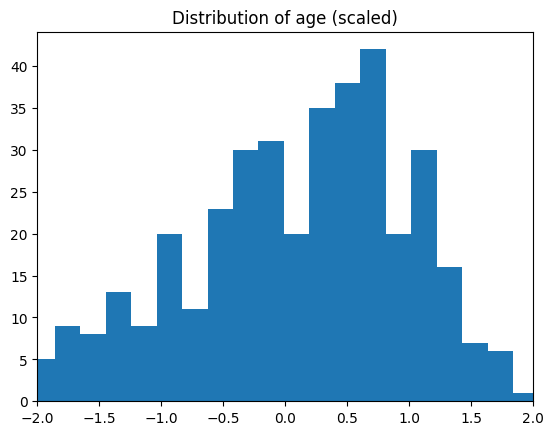

In [8]:
##look at the distributions of each variable
plt.hist(X['age'], bins=25)
plt.title("Distribution of age (scaled)")
plt.xlim(-2,2)
plt.show()

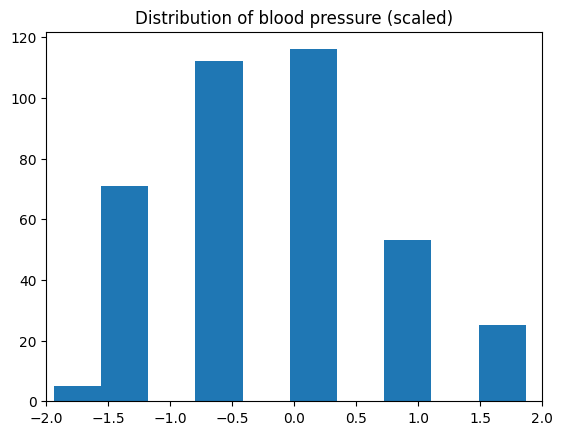

In [9]:
plt.hist(X['bp'], bins=25)
plt.title("Distribution of blood pressure (scaled)")
plt.xlim(-2,2)
plt.show()

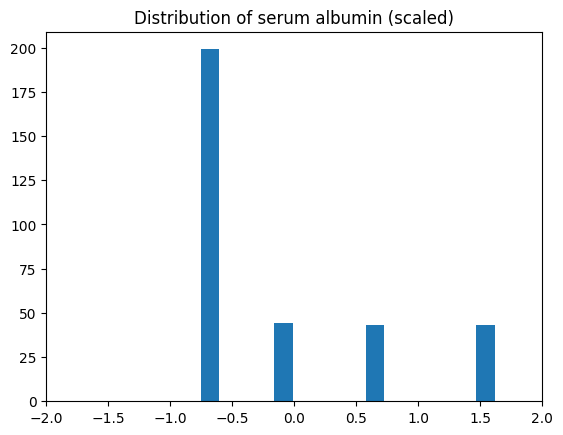

In [10]:
plt.hist(X['al'], bins=25)
plt.title("Distribution of serum albumin (scaled)")
plt.xlim(-2,2)
plt.show()

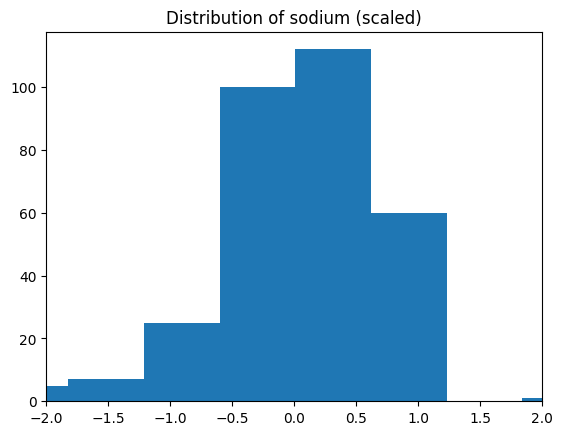

In [11]:
plt.hist(X['sod'], bins=25)
plt.title("Distribution of sodium (scaled)")
plt.xlim(-2,2)
plt.show()

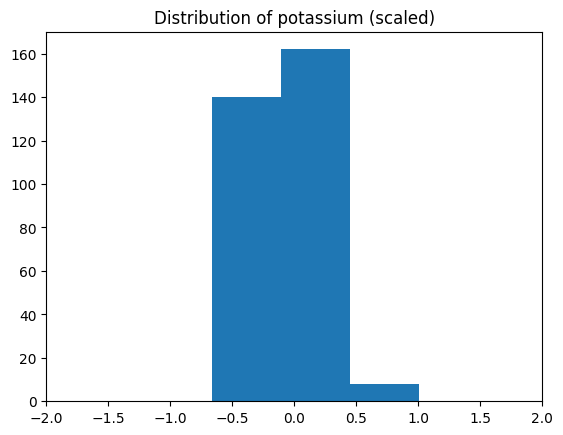

In [12]:
plt.hist(X['pot'], bins=25)
plt.title("Distribution of potassium (scaled)")
plt.xlim(-2,2)
plt.show()

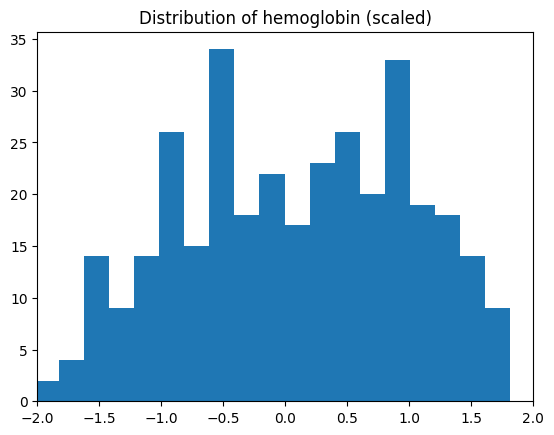

In [13]:
plt.hist(X['hemo'], bins=25)
plt.title("Distribution of hemoglobin (scaled)")
plt.xlim(-2,2)
plt.show()

Looking at the distributions of each of the six variables, it is noticed that serum albumin distribution greatly deviates from a normal distribution, compared to the other variables whose distributions somewhat resemble a normal distribution.

4. **Association Between Variables:** Analyze variable relationships and their implications for feature selection or extraction (at least three statements).


We can develop a correlation heatmap in order to determine variable relationships and their implications for feature selection or extraction.

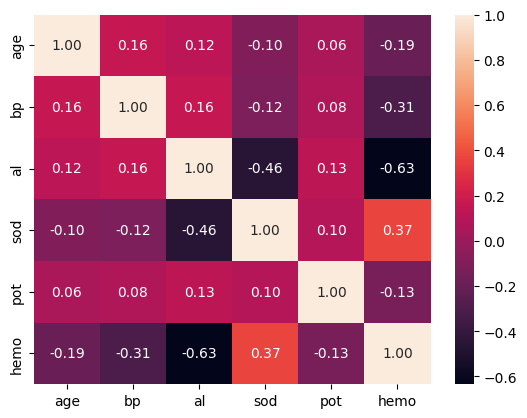

In [14]:
sns.heatmap(X.drop(['classification'], axis = 1).corr(), annot=True, fmt=".2f")
plt.show()

hemoglobin and albumin are moderately negatively correlated to eachother, with a correlation coefficient of -0.63. albumin and sodium are moderately negatively correlated to eachother, with a correlation coefficient of -0.46. sodium and hemoglobin are weakly positively correlated to eachother, with a correlation coefficient of 0.37. This suggests that whenever hemoglobin is high, then it is likely that sodium is high and albumin is low.

5. **Missing Value Analysis and Handling:** Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.


Since X is a truncated dataframe with only 6 variables (plus the classification response variable), anything missing values from the omitted variables will not be addressed since they're not going to be looked at. From the describe table above, every variable has missing values in its columns. For my strategy, I will simply remove rows that do contain all 6 variables in its observations; this is by far the simplest way of handling this situation even though we are losing valuable data that would help improve the model. 

In [15]:
#number of rows before removing rows with missing values
print(X.shape)

(400, 7)


In [16]:
X = X.dropna()
print(X.shape)

(243, 7)


There are now only 243 rows left in the dataframe. 

6. **Outlier Analysis:** Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.


I will not be addressing issues regarding outliers in the dataframe. After removing for missing values, nearly half of the rows were removed from the dataframe and further removing for outliers will further reduce the number of patients that the model will be training on. At this point, it is more paramount to keep as much information as possible despite how outliers can negatively affect a model. 

7. **Sub-group Analysis:** Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).


In [17]:
#I'll just separate the response variables from the 6 predictor variables here.
X['classification'].replace(['ckd', 'notckd'],
                        [0, 1], inplace=True)

y = X.classification
print(y)

3      0
5      0
6      0
9      0
11     0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 243, dtype: int64


C:\Users\kanen\AppData\Local\Temp\ipykernel_45112\567908095.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['classification'].replace(['ckd', 'notckd'],
C:\Users\kanen\AppData\Local\Temp\ipykernel_45112\567908095.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['classification'].replace([

In [18]:
X = X.drop('classification', axis=1)
X.head(5)

,age,bp,al,sod,pot,hemo
3,-0.203139,-0.473370,2.208413,-2.552778,-0.667102,-0.456071
5,0.496661,0.990117,1.468092,0.430254,-0.447583,-0.112239
6,0.963195,-0.473370,-0.752868,-3.226366,-0.196703,-0.043473
9,0.088445,0.990117,0.727772,-2.264098,-0.290783,-1.040585
11,0.671612,-0.473370,1.468092,-0.628241,-0.133983,-0.593604


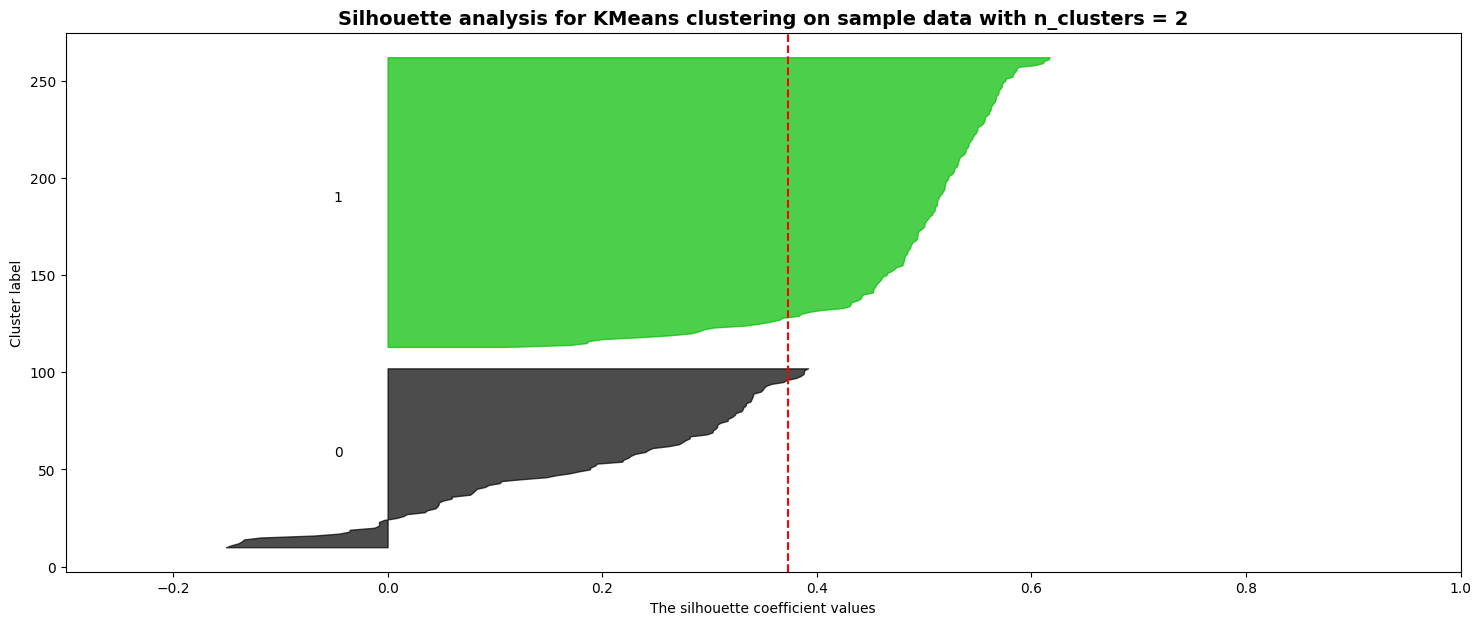

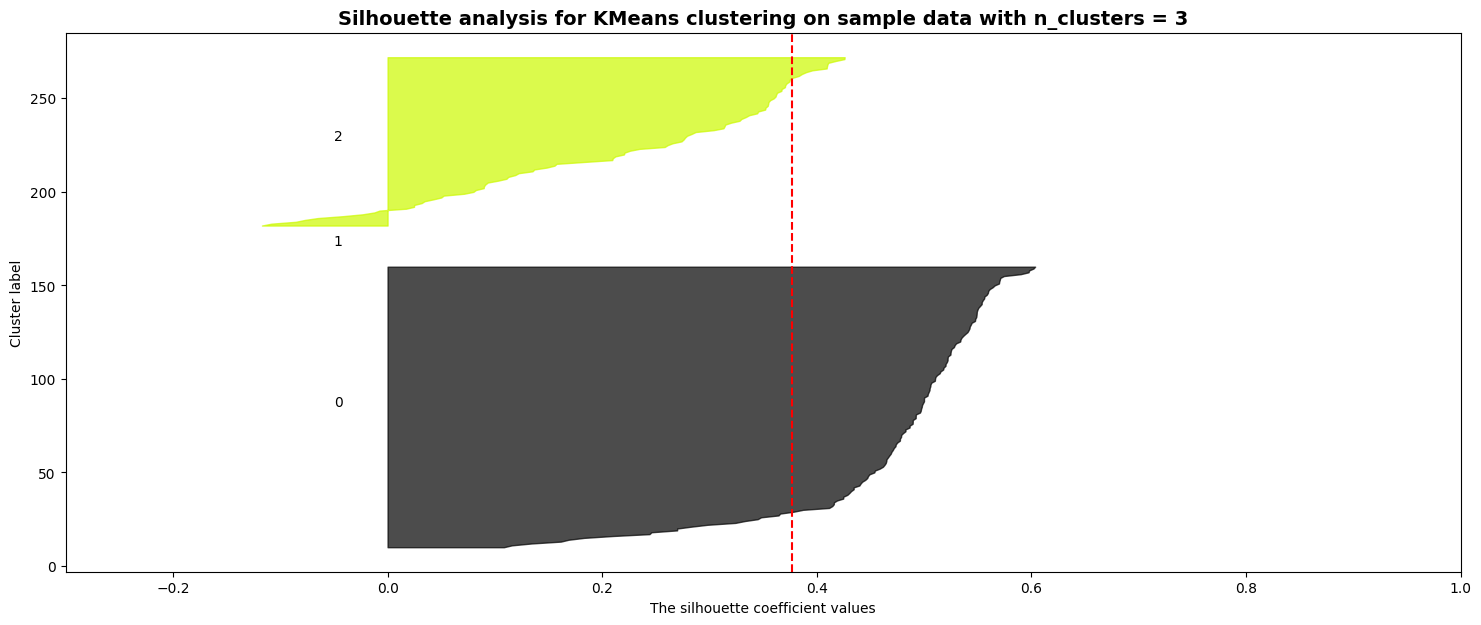

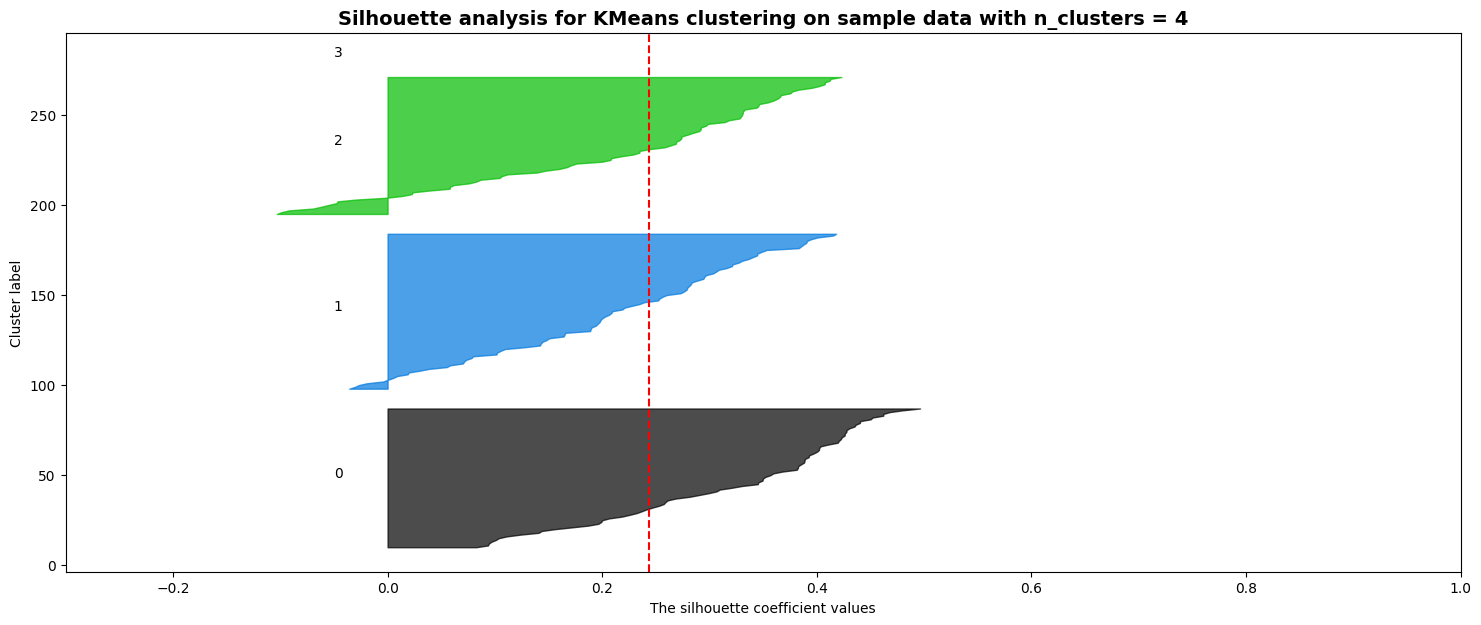

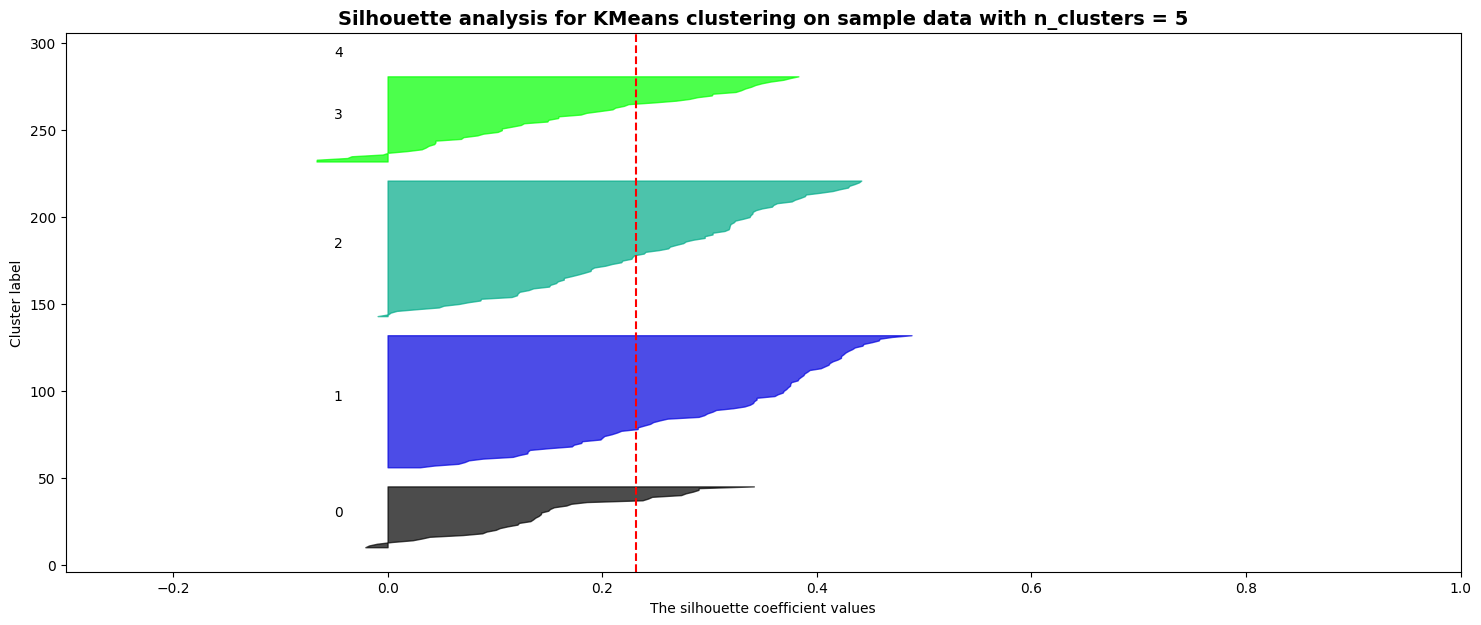

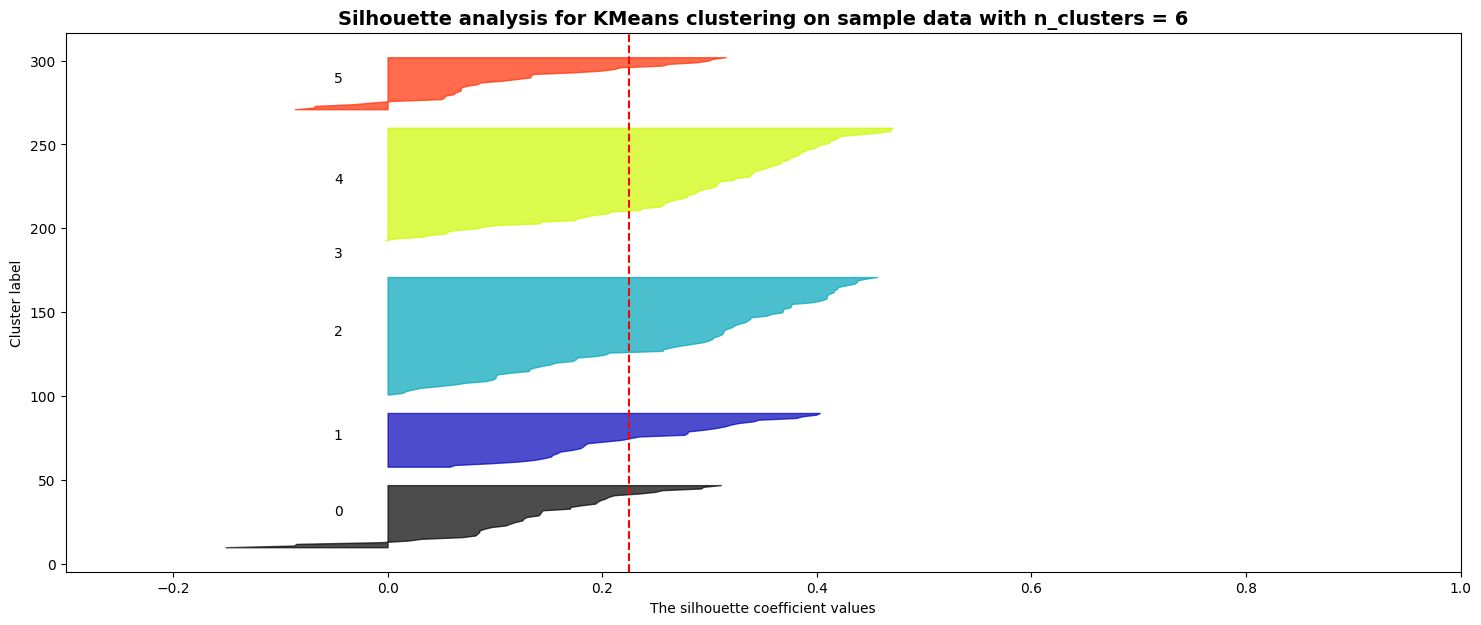

In [19]:
##using kmeans clustering to find optimal number of subgroups to use
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters = n_clusters, n_init = 20, random_state=0)
    cluster_labels_km = km.fit_predict(X)
    # average silhouette score
    silhouette_avg_km = silhouette_score(X, cluster_labels_km)
    # compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels_km)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.3, 1])# change this based on the silhouette range

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            y=np.arange(y_lower, y_upper),
            x1=0,
            x2=ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next cluster silhouette scores
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various cluster")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

From these silhouette diagrams, it is best for the data to be split into 2 subgroups.  This is because the silhouettes of the k=2 diagram is actually contains the right amount of silhouettes as the k value of 2, unlike the rest of the diagrams. The k=2 diagram also has the largest silhouette coefficient value (aka the right line is farthest to the right).

In [20]:
##visulize the two subgroups
km2 = KMeans(n_clusters = 2, n_init=20, random_state=0)
km2.fit(X)

KMeans(n_clusters=2, n_init=20, random_state=0)

In [21]:
pca_X = PCA()
pca_loadings = pd.DataFrame(pca_X.fit(X).components_.T,
                            index=X.columns,
                            columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6
age,0.246188,-0.734196,-0.321204,0.544226,0.001589,0.031485
bp,0.318223,-0.308974,0.891770,-0.038399,-0.040098,0.070233
al,0.613914,0.189230,-0.200457,-0.144855,-0.717363,0.107357
sod,-0.290532,-0.059450,0.133735,0.178213,-0.458530,-0.807566
pot,0.151026,0.561887,0.173399,0.788224,0.079130,0.062032
hemo,-0.594993,-0.102136,0.115927,0.168237,-0.516980,0.571437


In [29]:
pc_scores = pd.DataFrame(pca_X.fit_transform(X),
                         columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'],
                         index = X.index)

We can reduce the dataframe into 2 principle components since PC1+PC2 contribute to more than half of variance explained. 

C:\Users\kanen\AppData\Local\Temp\ipykernel_45112\1542230423.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.arrow(0,0,pca_loadings.PC1[0], -pca_loadings.PC2[0])
C:\Users\kanen\AppData\Local\Temp\ipykernel_45112\1542230423.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.arrow(0,0,pca_loadings.PC1[1], -pca_loadings.PC2[1])
C:\Users\kanen\AppData\Local\Temp\ipykernel_45112\1542230423.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, us

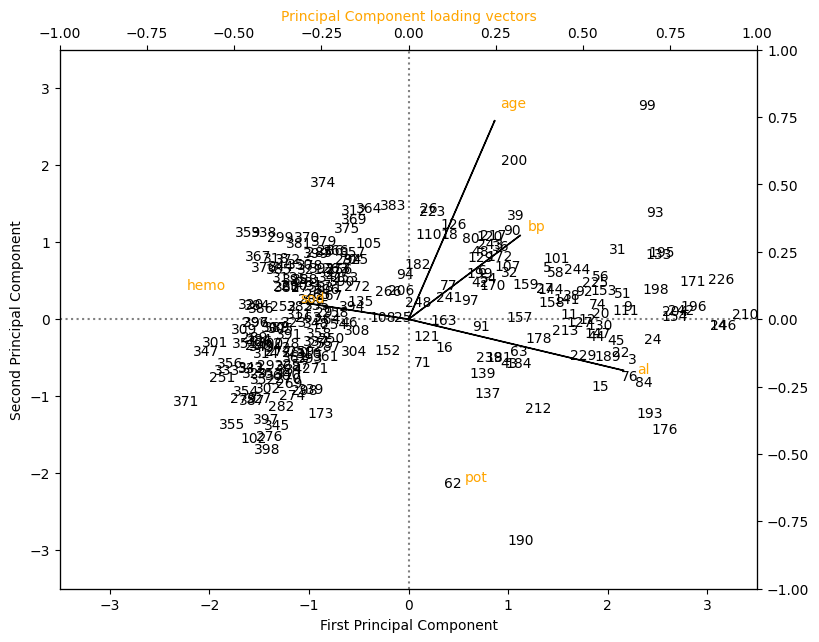

In [30]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in pc_scores.index:
    ax1.annotate(i, (pc_scores.PC1.loc[i], -pc_scores.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['PC1', 'PC2']].index:
    ax2.annotate(i, (pca_loadings.PC1.loc[i]*a, -pca_loadings.PC2.loc[i]*a), color='orange')

# Plot vectors
ax2.arrow(0,0,pca_loadings.PC1[0], -pca_loadings.PC2[0])
ax2.arrow(0,0,pca_loadings.PC1[1], -pca_loadings.PC2[1])
ax2.arrow(0,0,pca_loadings.PC1[2], -pca_loadings.PC2[2])
ax2.arrow(0,0,pca_loadings.PC1[3], -pca_loadings.PC2[3])

plt.show()

We can see a very clear clustering of points in the left side of the diagram and another at the right side of the y-axis.

8. **Data Splitting:** Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

9. **Classifier Choices:** Identify the two classifiers you have chosen and justify your selections.


The two classifiers that will be used for this study will be K-nearest neighbours (KNN) classification and logistic regression classification. I will be using KNN because the algorithm was developed for placing data into specific subgroups based on the data's proximity to the aforementioned subgroup datapoints. I will be using logistic regression classification since the logistic regression is apt providing a probability as to which subgroup a piece of data should end up in. Logistic regression also works well because we will be conducting binary classification (aka classifying CKD or nor CKD).

10. **Performance Metrics:** Outline the two metrics for comparing the performance of the classifiers.


When using KNN, we can simply compare performance using the accuracy_score command line, which allows us to know the percentage of predictions in KNN classification were accurate. 

When using logistic regression classification, we can compare performance using the ROC AUC score, which measures the area under a ROC curve. The higher the score, the better the performance of the classifiers.  

11. **Feature Selection/Extraction:** Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).


One feature selection tool learned in class that we can implement for logistic regression classification is LASSO.

In [38]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [26]:
lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5, max_iter=1500)

12. **Classifier Comparison:** Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).


In [27]:
##logistic regression classicifcation with LASSO
lasso_cv.fit(X_train, y_train)
m_lasso = Lasso(alpha=lasso_cv.alpha_)
m_lasso.fit(X_train, y_train) 
m_lasso_pre = m_lasso.predict(X_test)
pd.DataFrame({'Feature': X_train.columns, 'Coefficient': m_lasso.coef_.reshape(len(X_train.columns))})

,Feature,Coefficient
0,age,-0.058263
1,bp,-0.053795
2,al,-0.138696
3,sod,0.059053
4,pot,0.021389
5,hemo,0.241279


In [36]:
df = pd.DataFrame(data = {'prob': m_lasso_pre, 'y_test': y_test})

In [39]:
fpr, tpr, thresholds = roc_curve(df.y_test, df.prob)

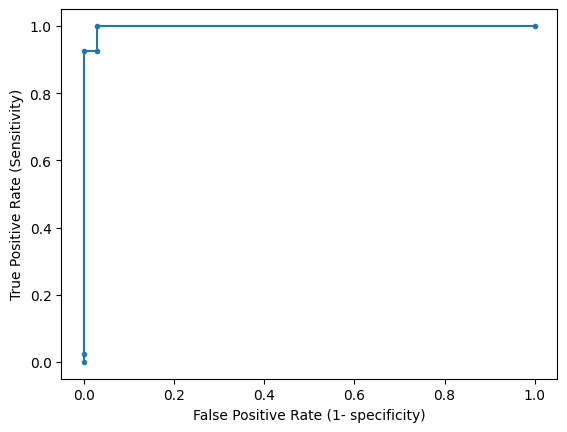

In [40]:
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate (1- specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [41]:
roc_auc_score(df.y_test, df.prob)

0.9977272727272728

Using LASSO + logistic regression to classify CKD or no CKD using the 6 prescribed variables seems to be a very good model. In the context of flipping a coin, the ROC score suggests that this model is correctly classifying whether a patient has CKD or not 99.77% of the time and is significantly better than just classifying via just flipping a coin.

In [47]:
from sklearn import neighbors
from sklearn import metrics

In [50]:
##now let's check classification using KNN
##first we have to check which value of k is the best for this model
k_range = range(1, 10)
scores = [] 

for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(round(metrics.accuracy_score(y_test, y_pred),2))

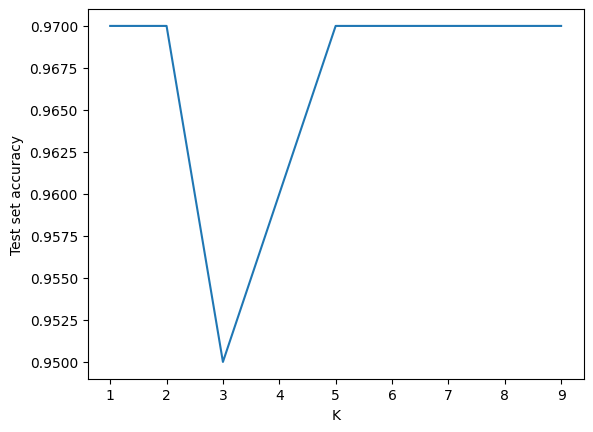

In [51]:
plt.plot(k_range, scores)
plt.xlabel('K')
plt.ylabel('Test set accuracy')
plt.xticks(range(1,10))
plt.show()

It looks like model accuracy is highest at k=1,2,4,5,6,7,8,9 in this diagram. Since these scores are the same, the best option to pick would be to choose the smallest value of k for KNN, which would be k=1. 

In [58]:
knn = neighbors.KNeighborsClassifier(
    n_neighbors = 1,
    algorithm='brute'
    )

In [59]:
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [60]:
print(round(metrics.accuracy_score(y_test, pred),2))

0.97


In [61]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))

[[32  1]
 [ 1 39]]


Looking at the confusion matrix produced by KNN classification, it looks like the KNN classification is able to matched expected results to actual results, which suggests that our KNN classification is a good model. 

Overall, these two classifiers performed really well at classifying as to whether a patient has CKD or not. If I had to choose one classifier to use, I would choose the LASSO regression classifier because the model ROC score of 0.9977 is higher than the still-high accuracy score of 0.97 for the KNN classifier. 

13. **Interpretable Classifier Insight:** After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).


In [79]:
kidney_disease.select_dtypes(include='object').columns

Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [80]:
###create a new dataframe for retraining for KNN classification containing all numeric data
ZX = kidney_disease.drop(['id', 'rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'], axis=1)
ZX = ZX.dropna()

Zy = ZX.classification
ZX = ZX.drop(['classification'], axis=1)

In [81]:
ZX_train, ZX_test, Zy_train, Zy_test = train_test_split(
    ZX, Zy, test_size=0.3, random_state=1, stratify=Zy)

In [82]:
k_range = range(1, 10)
scores = [] 

for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(ZX_train, Zy_train)
    Zy_pred = knn.predict(ZX_test)
    scores.append(round(metrics.accuracy_score(Zy_test, Zy_pred),2))

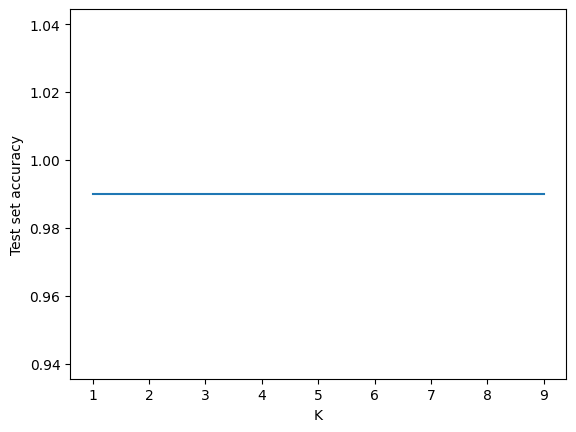

In [84]:
plt.plot(k_range, scores)
plt.xlabel('K')
plt.ylabel('Test set accuracy')
plt.xticks(range(1,10))
plt.show()

Interestingly, bringing back a portion of the dataframe for retraining improves the KNN classifier to an accuracy score of 0.99. This suggests that the initially omitted variables are also applicable in its use for its ability to help with CKD identification. However, it can be stated that the 6 variables that were looked at throughout the study are very significant at determining CKD if just those 6 variables (blood pressure, age, potassium, hemoglobin, sodium, albumin) provide an accuracy score of 0.97.

14. **[Bonus]** Sub-group Improvement Strategy: If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).


N/A.

15. **Team Contributions:** Document each team member's specific contributions related to the questions above.


N/A.

16. **Link** to the public GitHub repository.

\newpage